In [4]:
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 

# Metrics
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score

#visualization 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')  # Suppress all warnings

## Load the dataset

In [5]:
df = pd.read_csv('Data/station01.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33408 entries, 0 to 33407
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_time          33408 non-null  object 
 1   nwp_globalirrad    33408 non-null  float64
 2   nwp_directirrad    33408 non-null  float64
 3   nwp_temperature    33408 non-null  float64
 4   nwp_humidity       33408 non-null  float64
 5   nwp_windspeed      33408 non-null  float64
 6   nwp_winddirection  33408 non-null  float64
 7   nwp_pressure       33408 non-null  float64
 8   lmd_totalirrad     33408 non-null  float64
 9   lmd_diffuseirrad   33408 non-null  float64
 10  lmd_temperature    33408 non-null  float64
 11  lmd_pressure       33408 non-null  float64
 12  lmd_winddirection  33408 non-null  float64
 13  lmd_windspeed      33408 non-null  float64
 14  power              33408 non-null  float64
dtypes: float64(14), object(1)
memory usage: 3.8+ MB


In [6]:
df.describe() # quick dataset overview

,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
count,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000,33408.000000
mean,158.834149,138.337171,13.568517,49.915118,4.162282,180.708287,1017.868802,183.325033,81.412042,13.086279,1020.149717,189.823938,1.040493,3.677611
std,235.866804,217.017108,11.616587,23.757565,2.258577,99.411753,10.806694,271.392112,118.717281,11.770667,10.533265,104.462227,1.217974,5.553049
min,0.000000,0.000000,-13.460000,7.100000,0.090000,0.010000,993.160000,0.000000,0.000000,-13.100000,993.500000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,3.990000,29.920000,2.530000,89.797500,1008.080000,0.000000,0.000000,3.400000,1010.700012,124.199997,0.000000,0.000000
50%,0.000000,0.000000,13.130000,47.330000,3.600000,188.800000,1018.350000,0.900000,2.500000,12.900000,1020.299988,175.300003,0.700000,0.000000
75%,278.115000,232.375000,23.690000,69.172500,5.440000,249.435000,1025.392500,320.725006,132.325001,23.400000,1027.400024,283.299988,1.600000,6.464543
max,936.420000,879.530000,39.010000,100.000000,14.550000,360.000000,1044.790000,1242.300049,744.000000,38.099998,1049.099976,359.899994,11.300000,19.997459


In [7]:
df.head()

,date_time,nwp_globalirrad,nwp_directirrad,nwp_temperature,nwp_humidity,nwp_windspeed,nwp_winddirection,nwp_pressure,lmd_totalirrad,lmd_diffuseirrad,lmd_temperature,lmd_pressure,lmd_winddirection,lmd_windspeed,power
0,2018-06-30 16:00:00,0.0,0.0,26.47,54.44,3.66,127.96,1004.46,0.0,0.0,24.700001,1007.200012,161.399994,0.9,0.0
1,2018-06-30 16:15:00,0.0,0.0,26.24,55.63,3.53,128.51,1004.45,0.0,0.0,24.500000,1007.200012,147.300003,1.3,0.0
2,2018-06-30 16:30:00,0.0,0.0,26.03,56.73,3.38,128.77,1004.52,0.0,0.0,24.700001,1006.099976,144.000000,0.7,0.0
3,2018-06-30 16:45:00,0.0,0.0,25.80,57.87,3.27,128.81,1004.19,0.0,0.0,24.500000,1007.200012,161.399994,1.3,0.0
4,2018-06-30 17:00:00,0.0,0.0,25.59,58.97,3.14,127.53,1004.16,0.0,0.0,24.299999,1006.900024,166.399994,0.8,0.0


## Correlation heatmap

Text(0.5, 1.0, 'Correlation Heatmap')

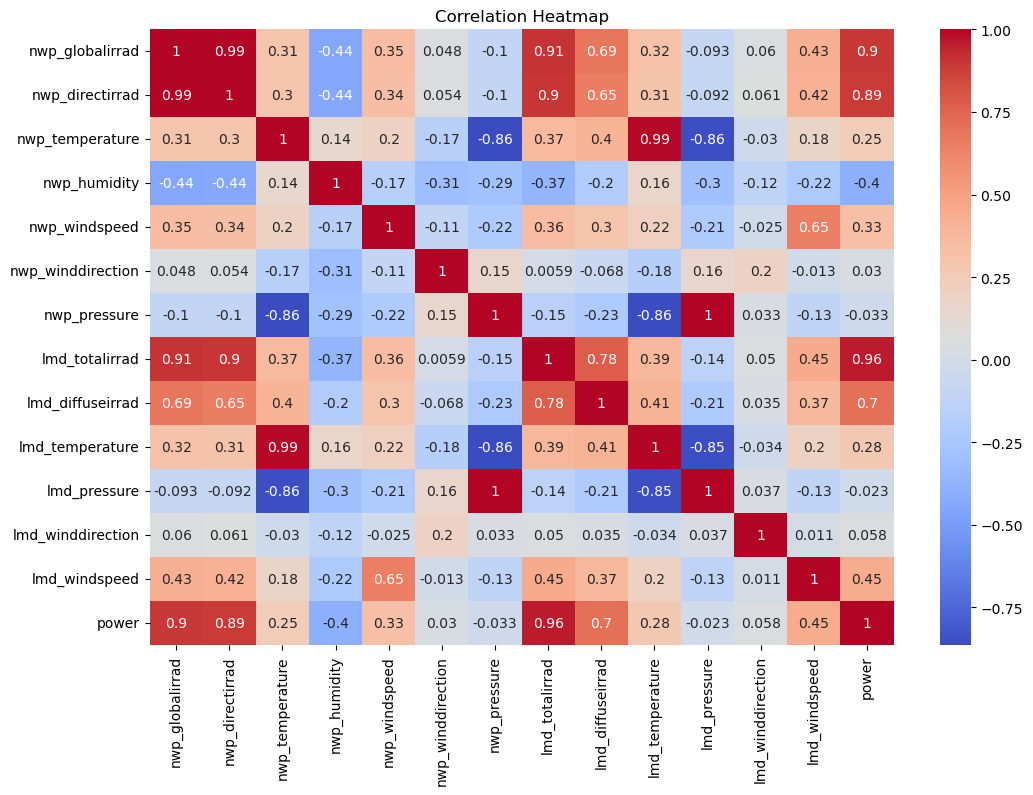

In [8]:
plt.figure(figsize=(12,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')

## Define a target class

In [9]:
# Compute descriptive stats
mean_p = df['power'].mean()
std_p = df['power'].std()

# print for inspection
print(f"Mean: {mean_p:.2f}, Std: {std_p:.2f}, Max: {df['power'].max():.2f}")

# Define a more interpretable classification rule
def categorize_power(p):
    if p < mean_p * 0.4:  # Low but not close to zero (40% of mean as cutoff)
        return 'Low'
    elif mean_p * 0.4 <= p <= mean_p * 1.2:  # Around the mean (±20%) 1.47 <= p <= 4.41
        return 'Medium'
    else:
        return 'High'

# Apply classification
df['power_class'] = df['power'].apply(categorize_power)

# Check distribution
print(df['power_class'].value_counts())

Mean: 3.68, Std: 5.55, Max: 20.00
power_class
Low       20577
High       9879
Medium     2952
Name: count, dtype: int64
